Importing the required libraries.

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pickle
from PIL import Image
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import pickle
import os
import torch.nn.functional as F
import requests
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import pandas as pd
torch.manual_seed(1)
from sklearn import preprocessing
from torch.utils.data import DataLoader, Dataset, Subset
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

# Importing Dataset and Preprocessing of data

In [ ]:
IMAGE_SIZE = 32

mean, std = [0.4914, 0.4822, 0.4465], [0.247, 0.243, 0.261]

composed_train = transforms.Compose([transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
                                     transforms.RandomRotation(20), 
                                     transforms.RandomHorizontalFlip(0.1), 
                                     transforms.ColorJitter(brightness = 0.1, 
                                                            contrast = 0.1, 
                                                            saturation = 0.1), 
                                     transforms.RandomAdjustSharpness(sharpness_factor = 2,
                                                                      p = 0.1), 
                                     transforms.ToTensor(),  
                                     transforms.Normalize(mean, std), 
                                     transforms.RandomErasing(p=0.75,scale=(0.02, 0.1),value=1.0, inplace=False)])


composed_test = transforms.Compose([transforms.Resize((IMAGE_SIZE,IMAGE_SIZE)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean, std)])

In [ ]:
train_dataset =  dsets.CIFAR10(root='./data', train=True, download=True, transform = composed_train)
validation_dataset = dsets.CIFAR10(root='./data', train=False, download=True, transform = composed_test)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=100)

100%|██████████| 170498071/170498071 [00:04<00:00, 42004799.09it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 [==============================] - 5s 0us/step


In [ ]:
# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

In [ ]:
print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape)) 
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))


Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


# Defining Base Model

In [ ]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.2))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.2))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.2))
model1.add(Flatten())
model1.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(1024, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dropout(0.2))
model1.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dropout(0.2))
model1.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dropout(0.4))
model1.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(256, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dropout(0.2))
model1.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(lr=0.01, momentum=0.9)
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 64)        36928     
                                                        

Training on defined model.

In [ ]:
history1=model1.fit(x_train,y_train_cat,epochs=15,validation_data=(x_test,y_test_cat))

Epoch 1/15
1563/1563 [==============================] - 507s 324ms/step - loss: 2.1174 - accuracy: 0.1601 - val_loss: 1.8727 - val_accuracy: 0.2463
Epoch 2/15
1563/1563 [==============================] - 505s 323ms/step - loss: 1.7650 - accuracy: 0.3001 - val_loss: 1.6352 - val_accuracy: 0.3576
Epoch 3/15
1563/1563 [==============================] - 509s 326ms/step - loss: 1.5529 - accuracy: 0.4100 - val_loss: 1.5235 - val_accuracy: 0.4189
Epoch 4/15
1563/1563 [==============================] - 507s 325ms/step - loss: 1.4025 - accuracy: 0.4904 - val_loss: 1.2522 - val_accuracy: 0.5556
Epoch 5/15
1563/1563 [==============================] - 503s 322ms/step - loss: 1.2559 - accuracy: 0.5595 - val_loss: 1.1825 - val_accuracy: 0.6055
Epoch 6/15
1563/1563 [==============================] - 504s 322ms/step - loss: 1.1466 - accuracy: 0.6091 - val_loss: 1.0737 - val_accuracy: 0.6453
Epoch 7/15
1563/1563 [==============================] - 506s 324ms/step - loss: 1.0669 - accuracy: 0.6419 - val_

Evaluating the trained model.

In [ ]:
evaluation = model1.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

313/313 [==============================] - 23s 72ms/step - loss: 0.7680 - accuracy: 0.7565
Test Accuracy: 0.7565000057220459


# Changing the weights of trained model

In [ ]:
original_w = model1.get_weights()
original_w

[array([[[[-9.62885618e-01, -6.58151448e-01, -3.76916647e-01,
           -9.69737917e-02,  4.83044833e-01, -5.44458747e-01,
           -3.48930448e-01,  6.18877590e-01, -1.34053126e-01,
           -7.23539114e-01, -2.16007411e-01,  1.67483643e-01,
            7.56980598e-01, -1.40166566e-01, -2.37255439e-01,
           -6.61988705e-02,  4.47284758e-01,  4.85720247e-01,
           -3.09152961e-01, -7.22227573e-01, -3.59749764e-01,
            1.84131652e-01, -2.00427338e-01,  2.17677414e-01,
            5.77992916e-01,  6.86800003e-01,  2.42506832e-01,
           -1.26616389e-01,  2.00198203e-01, -9.08073690e-03,
           -4.20344085e-01, -4.20449227e-01],
          [-1.06046259e-01,  2.40808293e-01, -2.89617509e-01,
            3.87031317e-01, -4.77017105e-01, -1.05774188e-02,
            3.45087320e-01, -2.03616500e-01, -9.13865328e-01,
           -9.69204187e-01, -1.10374622e-01, -8.78752694e-02,
            2.18297139e-01,  1.67306170e-01, -5.87564111e-01,
           -4.16056722e-

Storing number of hidden layer defined in the base model

In [ ]:
num_layers=12

Changing the weights of model starting from last layer to first layer and accuracy is stored in accuracys.

In [ ]:
accuracys=[]
x=num_layers
for i in range(len(original_w)-2,len(original_w)-1-2*num_layers,-2):
  accuracy=[]
  print("Layer :",x)
  for scalar in [.25, 0.5, .75, 0.9, 1.1,1.25,1.5,1.75,2.]:
    new_w=[]
    for w in range(len(original_w)):
      if(w==i):
        new_w.append(original_w[w]*scalar)
      else:
        new_w.append(original_w[w])
    model1.set_weights(new_w)
    evaluation = model1.evaluate(x_test, y_test_cat)
    print("Scallar {} --> test accuracy {}".format(scalar,evaluation[1]))
    accuracy.append(evaluation[1])
    model1.set_weights(original_w)
  x-=1
  model1.set_weights(original_w)
  accuracys.append(accuracy)

Layer : 12
313/313 [==============================] - 21s 68ms/step - loss: 1.1726 - accuracy: 0.7603
Scallar 0.25 --> test accuracy 0.7602999806404114
313/313 [==============================] - 24s 76ms/step - loss: 0.8473 - accuracy: 0.7607
Scallar 0.5 --> test accuracy 0.760699987411499
313/313 [==============================] - 23s 72ms/step - loss: 0.7592 - accuracy: 0.7580
Scallar 0.75 --> test accuracy 0.7580000162124634
313/313 [==============================] - 21s 69ms/step - loss: 0.7570 - accuracy: 0.7574
Scallar 0.9 --> test accuracy 0.7573999762535095
313/313 [==============================] - 23s 72ms/step - loss: 0.7860 - accuracy: 0.7562
Scallar 1.1 --> test accuracy 0.7562000155448914
313/313 [==============================] - 23s 72ms/step - loss: 0.8229 - accuracy: 0.7562
Scallar 1.25 --> test accuracy 0.7562000155448914
313/313 [==============================] - 21s 68ms/step - loss: 0.9024 - accuracy: 0.7551
Scallar 1.5 --> test accuracy 0.7551000118255615
313/313

Layer-wise accuracy across all the change in weights are plotted. Scalars contains the scalars used to change the weights.

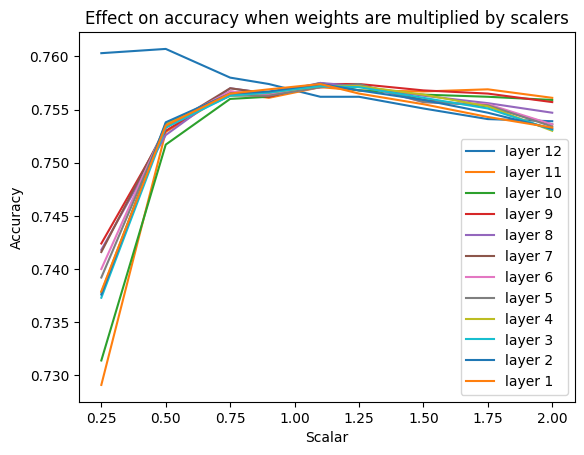

In [ ]:
scalars=[ .25, 0.5, .75, 0.9, 1.1,1.25,1.5,1.75,2.]
for i in range(len(accuracys)):
  plt.plot(scalars, accuracys[i], label=f'layer {num_layers-i}')
plt.xlabel('Scalar')
plt.ylabel('Accuracy')
plt.title('Effect on accuracy when weights are multiplied by scalers')
plt.legend()
plt.show()

Average stores the average accuracy of each layer across all weight change.

In [ ]:
average=[]
for i in accuracys:
  average.append(sum(i)/len(i))
print(average)

[0.7568777799606323, 0.7531444430351257, 0.7531222237481011, 0.7546777725219727, 0.7543555564350553, 0.7541777822706435, 0.7539777755737305, 0.7538111011187235, 0.7537222239706252, 0.7535666624704996, 0.7536222206221687, 0.753533336851332]


Again changing the weights by adding impurities into the weights.

In [ ]:
accuracys=[]
x=num_layers
for i in range(len(original_w)-2,len(original_w)-1-2*num_layers,-2):
  accuracy=[]
  print("Layer :",x)
  for scalar in [.25, 0.5, .75, 0.9, 1.1,1.25,1.5,1.75,2.]:
    new_w=[]
    for w in range(len(original_w)):
      if(w==i):
        new_w.append(original_w[w]+scalar)
      else:
        new_w.append(original_w[w])
    model1.set_weights(new_w)
    evaluation = model1.evaluate(x_test, y_test_cat)
    print("Scallar {} --> test accuracy {}".format(scalar,evaluation[1]))
    accuracy.append(evaluation[1])
    model1.set_weights(original_w)
  x-=1
  model1.set_weights(original_w)
  accuracys.append(accuracy)

Layer : 12
313/313 [==============================] - 23s 72ms/step - loss: 0.7680 - accuracy: 0.7565
Scallar 0.25 --> test accuracy 0.7565000057220459
313/313 [==============================] - 23s 72ms/step - loss: 0.7680 - accuracy: 0.7565
Scallar 0.5 --> test accuracy 0.7565000057220459
313/313 [==============================] - 22s 71ms/step - loss: 0.7680 - accuracy: 0.7565
Scallar 0.75 --> test accuracy 0.7565000057220459
313/313 [==============================] - 23s 72ms/step - loss: 0.7680 - accuracy: 0.7565
Scallar 0.9 --> test accuracy 0.7565000057220459
313/313 [==============================] - 22s 69ms/step - loss: 0.7680 - accuracy: 0.7565
Scallar 1.1 --> test accuracy 0.7565000057220459
313/313 [==============================] - 24s 76ms/step - loss: 0.7680 - accuracy: 0.7565
Scallar 1.25 --> test accuracy 0.7565000057220459
313/313 [==============================] - 23s 72ms/step - loss: 0.7680 - accuracy: 0.7565
Scallar 1.5 --> test accuracy 0.7565000057220459
313/31

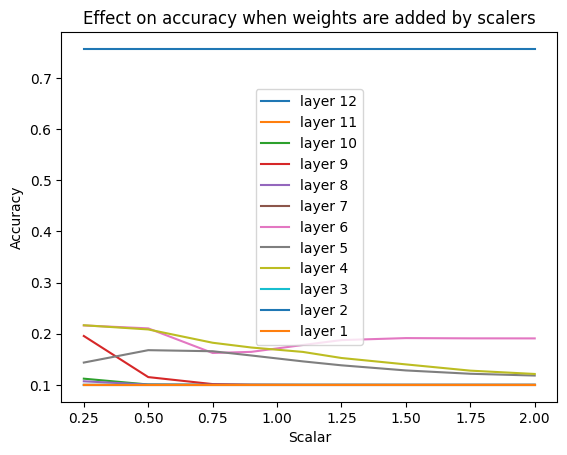

In [ ]:
for i in range(len(accuracys)):
  plt.plot(scalars, accuracys[i], label=f'layer {num_layers-i}')
plt.xlabel('Scalar')
plt.ylabel('Accuracy')
plt.title('Effect on accuracy when weights are added by scalers')
plt.legend()
plt.show()

In [ ]:
average=[]
for i in accuracys:
  average.append(sum(i)/len(i))
print(average)

[0.7565000057220459, 0.100011112789313, 0.10148889074722926, 0.11253333422872755, 0.10090000099605984, 0.10000000149011612, 0.18807777762413025, 0.1430666661924786, 0.16522222260634103, 0.100011112789313, 0.10000000149011612, 0.10000000149011612]


history=model.fit(x_train,y_train_cat,epochs=10,validation_data=(x_test,y_test_cat))

In [ ]:
accuracys=[]

In [ ]:
import random
import numpy as np
import struct
x=num_layers - 1
new_acc = []
indexes = []
weights = original_w.copy()
for i in range(len(original_w)-2,len(original_w)-1-(2*x),-2):
   indexes.append(i)
l1=indexes[::-1]
for i in range(len(l1)):
  
  for j in range(2,3,2):
    for k in range(len(weights[l1[i]])):
      
      idx=random.randint(0,len(weights[l1[i]][k])-1)
      r_weight = weights[l1[i]][k][idx]
      r_weight = format(struct.unpack('!I', struct.pack('!f', r_weight))[0], '032b')
      r_bit_index = random.randint(0,31)
      r_bit = r_weight[r_bit_index]
      
      if(r_bit == '0'):
        r_weight = r_weight[:r_bit_index] + '1' + r_weight[r_bit_index + 1:]
      if(r_bit == '1'):
        r_weight = r_weight[:r_bit_index] + '0' + r_weight[r_bit_index + 1:]
      r_weight = struct.unpack('!f',struct.pack('!I', int(r_weight, 2)))[0]
      weights[l1[i]][k][idx]=r_weight
  model1.set_weights(weights)
  print("no of weights changed: ",j)
  # acc = model1.evaluate(x_test, y_test)
  # print("test accuracy {}".format(acc[1]))
  evaluation = model1.evaluate(x_test, y_test_cat)
  print("test accuracy {}".format(evaluation[1]))
  new_acc.append(evaluation[1]*100)
  weights=original_w
  print("\n")

Setting back the original weights and checking if we get the same accuracy

In [ ]:
acc_graph=[]
for j in range(len(accuracys[0])):
  a=[]
  for i in range(len(accuracys)):
    a.append(accuracys[i][j])
  acc_graph.append(a)

In [ ]:
numberofweightchange=[50,75,100,125,150]
for i in range(len(acc_graph)):
  plt.plot(numberofweightchange, acc_graph[i], label=f'layer {len(acc_graph)-i-1}')
plt.xlabel('Number of weights changed')
plt.ylabel('Accuracy')
plt.title('Effect on accuracy when weights are changed by bit-flip')
plt.legend()
plt.show()

In [ ]:
average=[]
for i in acc_graph:
  average.append(sum(i)/len(i))
print(average)